# Analyzing Air Quality Data

## Overview

Data preparation is crucial as it ensures the data is clean and ready for analysis. In this notebook, we will cover the following methods and libraries used for:

1. **Data Preparation**
2. **Trend Analysis**
3. **Seasonal Decomposition**
4. **Visualization**

## 1. Data Preparation

**Libraries Used:**

- **Pandas**: A powerful library for data manipulation and analysis. It provides data structures like DataFrames, which are essential for handling and cleaning datasets.

**Methods:**

- **Load the Data**: Using Pandas to read the dataset and create a DataFrame.
- **Check Column Names**: Inspecting the first few rows and column names to understand the structure and content of the data.
- **Set Index**: Configuring the ‘datetime’ column as the index to facilitate time-based operations.
- **Select Relevant Columns**: Choosing columns of interest to focus the analysis on specific data points.
- **Handle Missing Values**: Removing or filling missing values to ensure the dataset is complete and accurate.
- **Sort the Data**: Organizing the data by datetime to maintain a proper time series order.

## 2. Trend Analysis

**Libraries Used:**

- **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A statistical data visualization library based on Matplotlib, which provides a high-level interface for drawing attractive and informative statistical graphics.

**Methods:**

- **Plot the Data**: Visualizing the original and smoothed data to observe trends using Matplotlib and Seaborn.
- **Resample Data**: Aggregating data to daily averages to smooth out short-term fluctuations and highlight longer-term trends.
- **Apply Rolling Window**: Using a rolling window technique to further smooth the time series and reveal underlying patterns.

## 3. Seasonal Decomposition

**Libraries Used:**

- **Statsmodels**: A library for statistical modeling and hypothesis testing. It provides tools for performing time series analysis and decomposition.

**Methods:**

- **Ensure Frequency**: Setting a frequency for the time series index to ensure accurate decomposition.
- **Interpolate Missing Values**: Filling in missing values using interpolation to maintain a continuous time series.
- **Perform Seasonal Decomposition**: Decomposing the time series into trend, seasonal, and residual components to analyze seasonal patterns and trends.

## 4. Visualization

**Libraries Used:**

- **Matplotlib**: For creating visual representations of the data, including plots of decomposed components and smoothed time series.

**Methods:**

- **Visualize Decomposed Components**: Plotting the observed, trend, seasonal, and residual components to gain insights into the time series data.
- **Visualize Original and Smoothed Data**: Creating plots to compare the original data with smoothed versions to observe trends and changes.



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df_air_quality = pd.read_csv("airquality.csv", sep=';', decimal=',', na_values=-200)


# Print the first few rows and column names to verify
print(df_air_quality.head())
print(df_air_quality.columns)

# Ensure 'datetime' is correctly set as index
df_air_quality['datetime'] = pd.to_datetime(df_air_quality['Date'] + ' ' + df_air_quality['Time'], format='%d/%m/%Y %H.%M.%S')
df_air_quality.set_index('datetime', inplace=True)

# Select the required columns (check exact column names from df_air_quality.columns output)
selected_columns = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']
df_air_quality = df_air_quality[selected_columns]

# Drop missing values
df_air_quality.dropna(inplace=True)

# Ensure the data is sorted by datetime
df_air_quality.sort_index(inplace=True)

print(df_air_quality.head())

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

## To analyze trends, we use resampling and rolling windows.

### Plot the Data: Visualize the original and smoothed data to observe trends.

### Resample Data: Resample the data to daily averages to smooth out fluctuations.

### Apply Rolling Window: A 7-day rolling window is applied to further smooth the time series.

                     PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
datetime                                                                  
2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

                     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
datetime                                                                      
2004-03-10 18:00:00    113.0        1692.0       1268.0  13.6  48.9  0.7578   
2004-03-10 19:00:00     92.0        1559.0        972.0  13.3  47.7  0.7255   
2004-03-10 20:00:00    114.0        1555.0       1074.0  11.9  54.0  0.7502   
2004-03-10 21:00:00    122.0        1584.0       1203.0  11.0  60.0  0.7867   


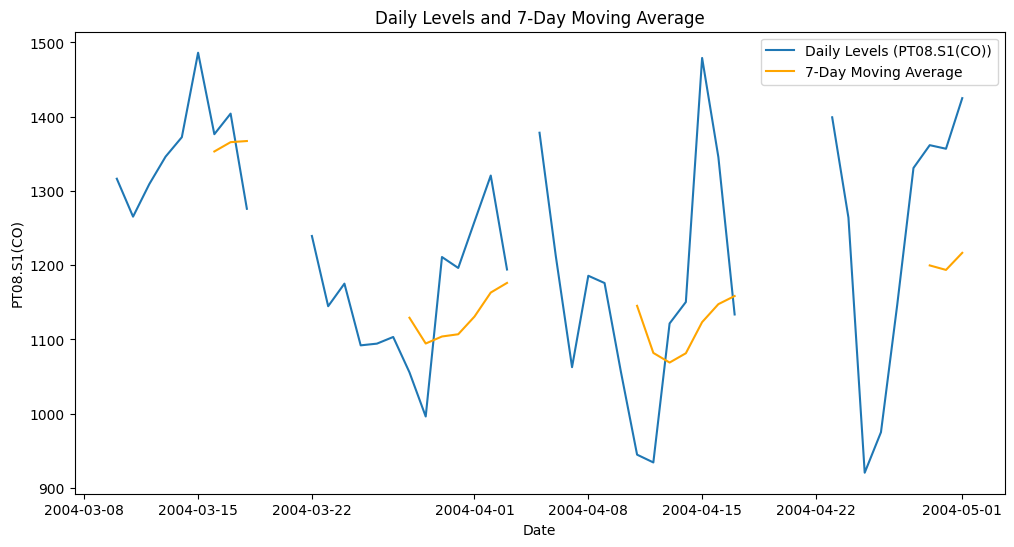

In [5]:

# Drop missing values
df_air_quality.dropna(inplace=True)

# Ensure the data is sorted by datetime
df_air_quality.sort_index(inplace=True)

print(df_air_quality.head())

# Resample the data to daily averages to smooth out the series
df_daily_air_quality = df_air_quality.resample('D').mean()

# Apply a rolling window to smooth the time series (e.g., 7-day rolling mean)
df_daily_rolling_air_quality = df_daily_air_quality.rolling(window=7).mean()

# Plot the resampled data and rolling mean for one of the columns (e.g., 'PT08.S1(CO)')
plt.figure(figsize=(12, 6))
plt.plot(df_daily_air_quality['PT08.S1(CO)'], label='Daily Levels (PT08.S1(CO))')
plt.plot(df_daily_rolling_air_quality['PT08.S1(CO)'], label='7-Day Moving Average', color='orange')
plt.title('Daily Levels and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('PT08.S1(CO)')
plt.legend()
plt.show()

## Seasonal decomposition helps in breaking down the time series data into trend, seasonal, and residual components.

### Ensure Frequency: Ensure the index has a frequency set.
### Interpolate Missing Values: Fill missing values using interpolation.
### Perform Seasonal Decomposition: Decompose the time series to identify patterns with a weekly period (7 days).


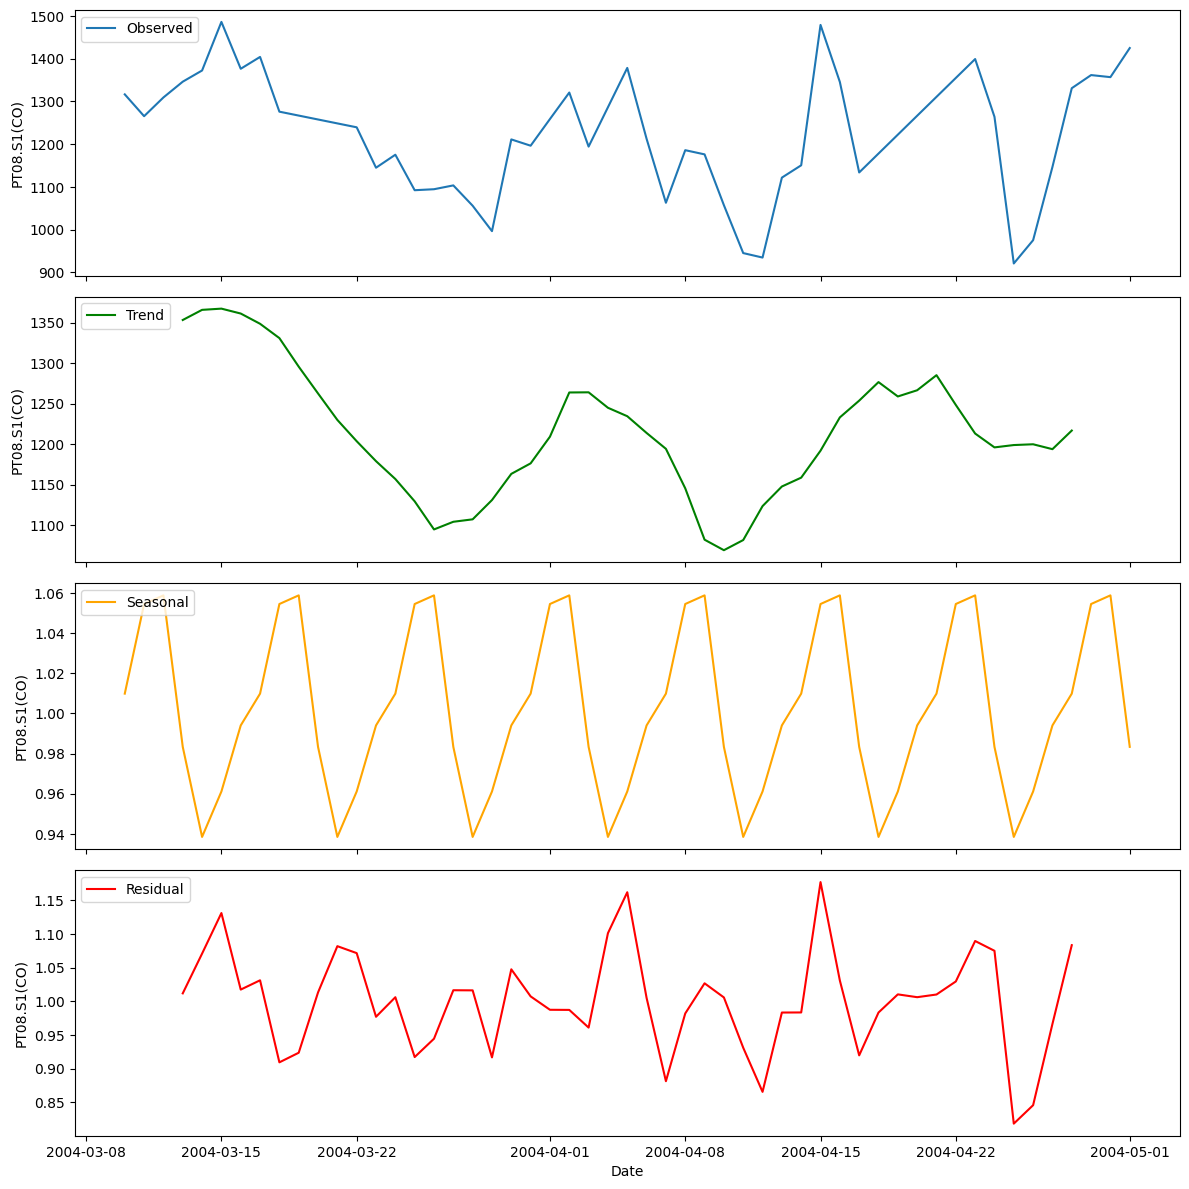

In [6]:
# Ensure the index has a frequency set
df_daily_air_quality = df_daily_air_quality.asfreq('D')

# Interpolate missing values
df_daily_interpolated_air_quality = df_daily_air_quality.interpolate()

# Perform seasonal decomposition on one of the columns (e.g., 'PT08.S1(CO)') with a weekly period
decomposition_result = seasonal_decompose(df_daily_interpolated_air_quality['PT08.S1(CO)'], model='multiplicative', period=7)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Observed
ax1.plot(decomposition_result.observed, label='Observed')
ax1.legend(loc='upper left')
ax1.set_ylabel('PT08.S1(CO)')

# Trend
ax2.plot(decomposition_result.trend, label='Trend', color='green')
ax2.legend(loc='upper left')
ax2.set_ylabel('PT08.S1(CO)')

# Seasonal
ax3.plot(decomposition_result.seasonal, label='Seasonal', color='orange')
ax3.legend(loc='upper left')
ax3.set_ylabel('PT08.S1(CO)')

# Residual
ax4.plot(decomposition_result.resid, label='Residual', color='red')
ax4.legend(loc='upper left')
ax4.set_ylabel('PT08.S1(CO)')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()

## Visualization helps in understanding and communicating the findings effectively.

### Visualize Decomposed Components: Plot the decomposed components (observed, trend, seasonal, and residual) for better insights.

### Visualize Original and Smoothed Data: Plot multiple columns to observe trends.

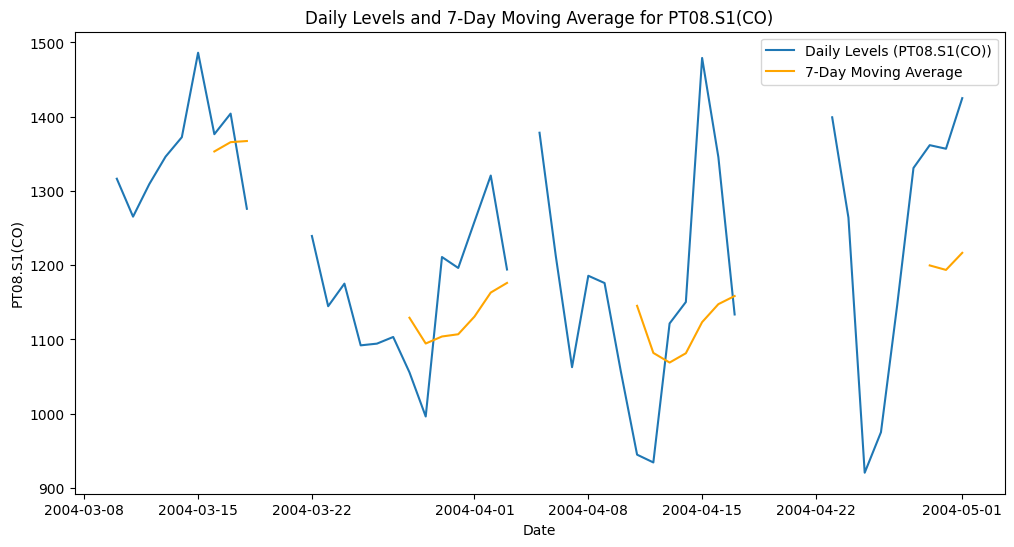

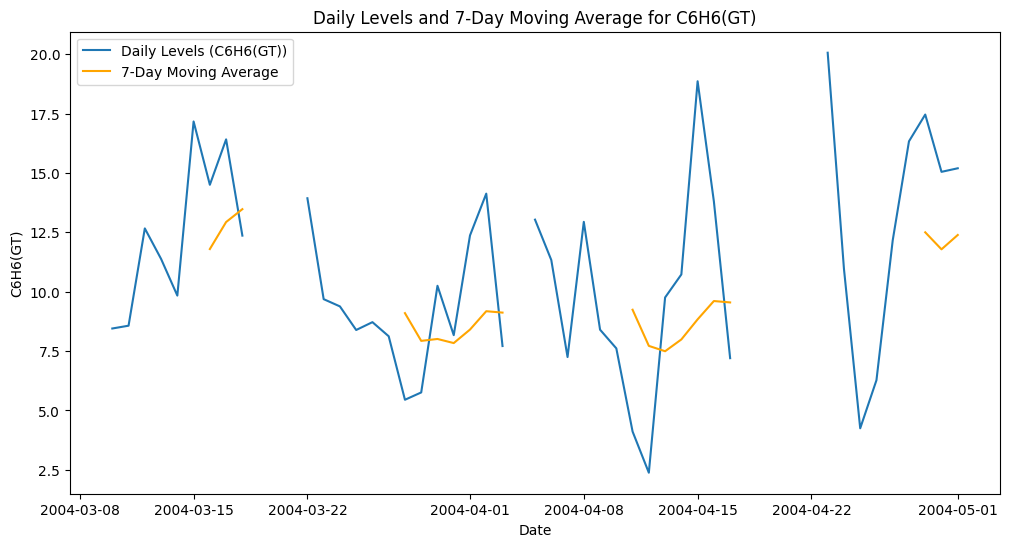

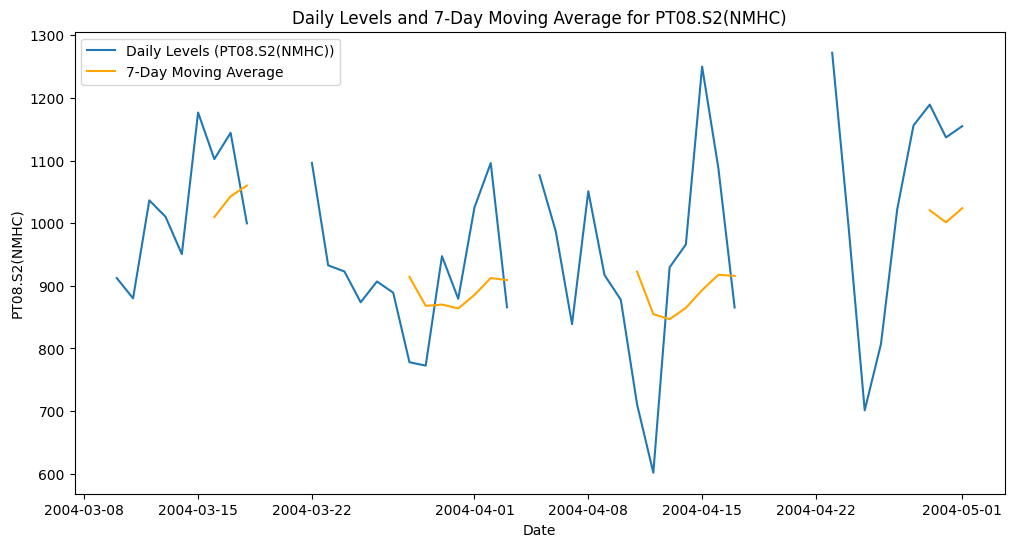

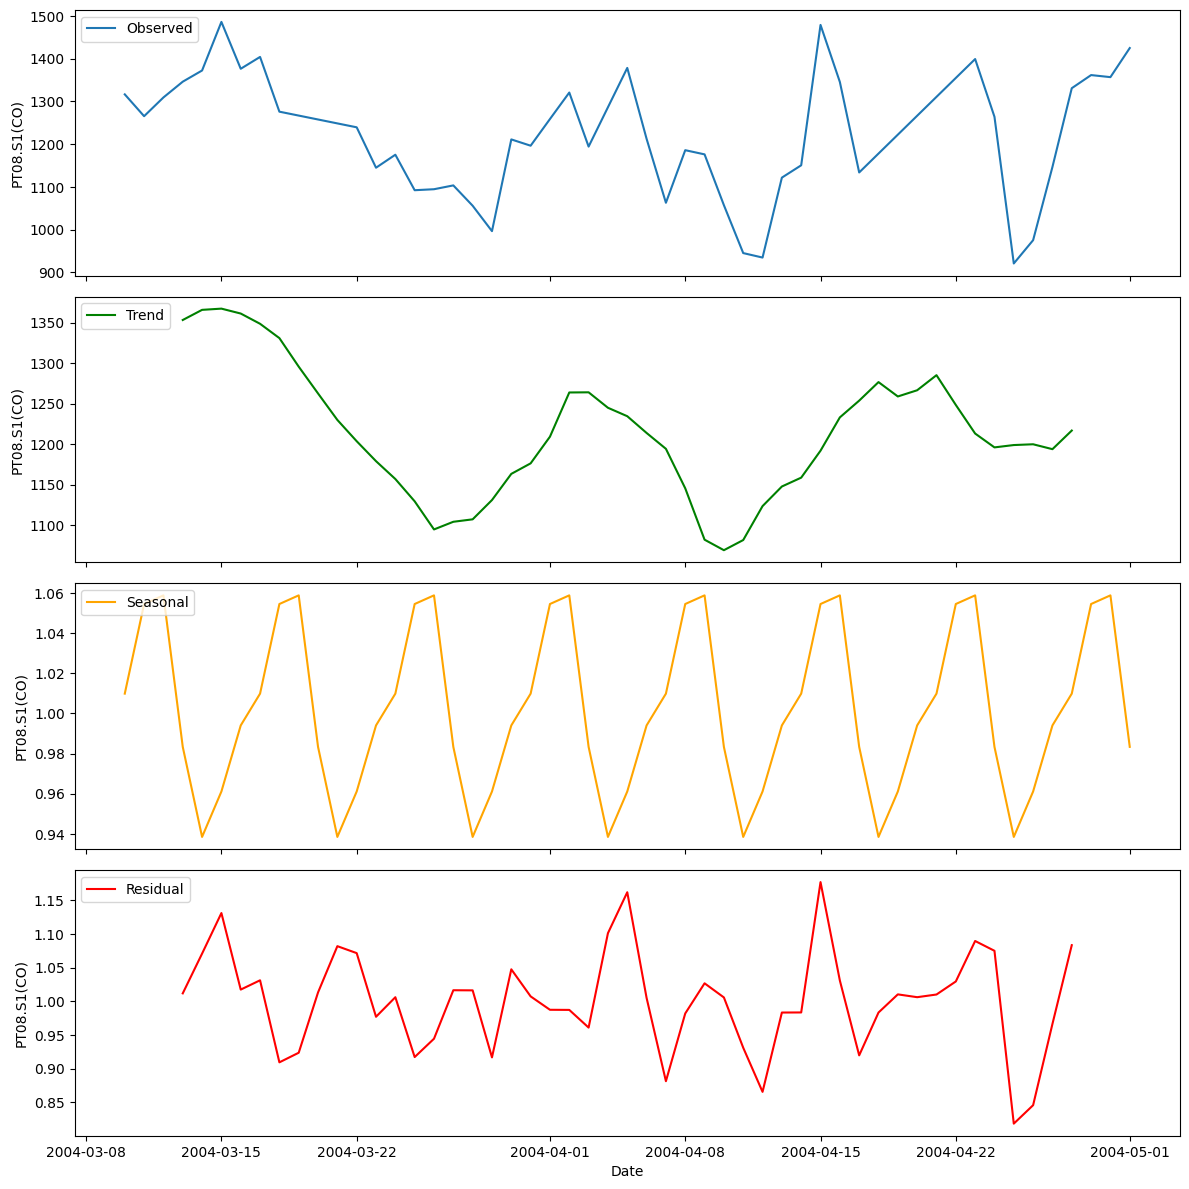

In [7]:
# Visualize Original and Smoothed Data for multiple columns
columns_to_plot = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    plt.plot(df_daily_air_quality[column], label=f'Daily Levels ({column})')
    plt.plot(df_daily_rolling_air_quality[column], label='7-Day Moving Average', color='orange')
    plt.title(f'Daily Levels and 7-Day Moving Average for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Visualize Decomposed Components for 'PT08.S1(CO)'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Observed
ax1.plot(decomposition_result.observed, label='Observed')
ax1.legend(loc='upper left')
ax1.set_ylabel('PT08.S1(CO)')

# Trend
ax2.plot(decomposition_result.trend, label='Trend', color='green')
ax2.legend(loc='upper left')
ax2.set_ylabel('PT08.S1(CO)')

# Seasonal
ax3.plot(decomposition_result.seasonal, label='Seasonal', color='orange')
ax3.legend(loc='upper left')
ax3.set_ylabel('PT08.S1(CO)')

# Residual
ax4.plot(decomposition_result.resid, label='Residual', color='red')
ax4.legend(loc='upper left')
ax4.set_ylabel('PT08.S1(CO)')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()